In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Load the dataset
DATASET_PATH = "furniture_dataset.csv"
df = pd.read_csv(DATASET_PATH)

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [2]:
# Display the first 5 rows
print("--- First 5 Rows ---")
display(df.head())

# Get a summary of the dataframe (data types, non-null counts)
print("\n--- Dataframe Info ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")

# This will show stats for any other numeric columns if they exist
display(df.describe())

--- First 5 Rows ---


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a



--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB

--- Descriptive Statistics ---


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
count,312,312,159,215,312,312,205,306,125,218,265,312
unique,305,264,153,135,87,305,155,286,9,72,143,305
top,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",MoNiBloom Store,"multiple shoes, coats, hats, and other items E...",$24.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/416WaLx1...,No,"36""L x 24""W",China,Wood,Black,02593e81-5c09-5069-8516-b0b29f439ded
freq,2,5,2,9,22,2,32,5,98,32,45,2


In [3]:
# Clean the 'price' column
# Remove the '$' sign and convert the column to a numeric type
df['price_numeric'] = df['price'].str.replace('$', '', regex=False).astype(float)

print("Cleaned 'price' column and created 'price_numeric'.")
display(df[['price', 'price_numeric']].head())

Cleaned 'price' column and created 'price_numeric'.


,price,price_numeric
0,$24.99,24.99
1,NaN,NaN
2,$5.98,5.98
3,$13.99,13.99
4,$89.99,89.99


C:\Users\A\AppData\Local\Temp\ipykernel_7264\412727422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette="viridis")


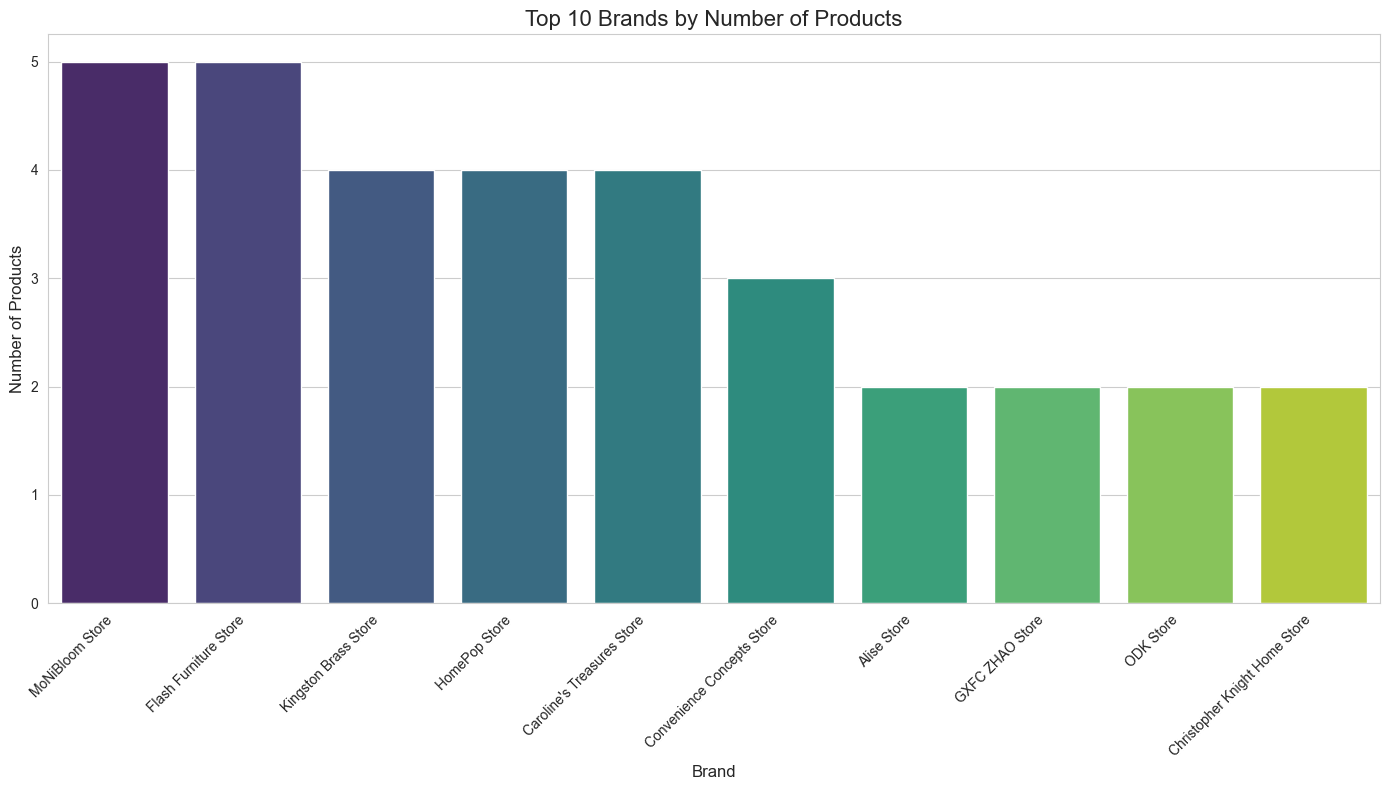

In [4]:
# Get the top 10 brands by product count
top_10_brands = df['brand'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette="viridis")

plt.title('Top 10 Brands by Number of Products', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

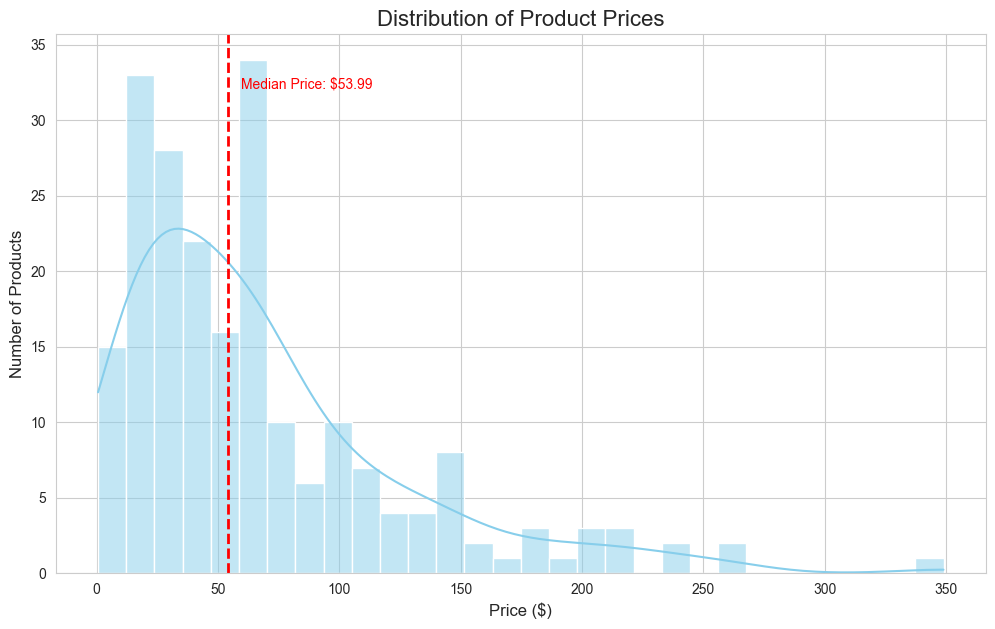

In [5]:
# Create a histogram of the numeric prices
plt.figure(figsize=(12, 7))
sns.histplot(df['price_numeric'], bins=30, kde=True, color='skyblue')

# Add the median price as a vertical line
median_price = df['price_numeric'].median()
plt.axvline(median_price, color='red', linestyle='--', linewidth=2)
plt.text(median_price * 1.1, plt.ylim()[1] * 0.9, f'Median Price: ${median_price:.2f}', color='red')

plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_7264\463742981.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="mako")


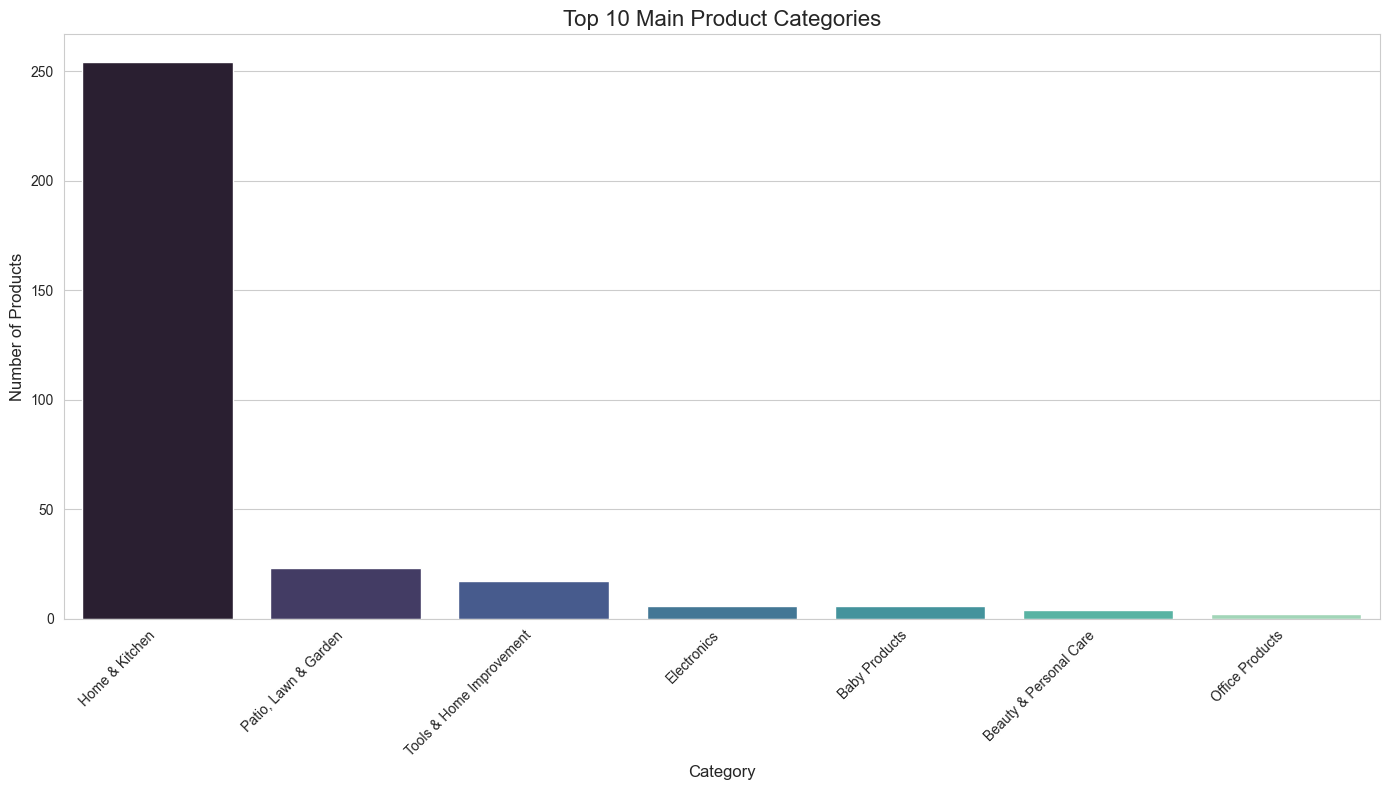

In [6]:
import ast

# Safely parse the string representation of lists into actual lists
# We'll skip rows that are not valid list strings
def parse_categories(cat_string):
    try:
        cats = ast.literal_eval(cat_string)
        # Return the first category if the list is not empty
        return cats[0] if isinstance(cats, list) and cats else None
    except (ValueError, SyntaxError):
        return None

# Create a new column with just the main category
df['main_category'] = df['categories'].apply(parse_categories)

# Get the top 10 main categories
top_10_categories = df['main_category'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="mako")
plt.title('Top 10 Main Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_7264\2881566920.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="rocket")


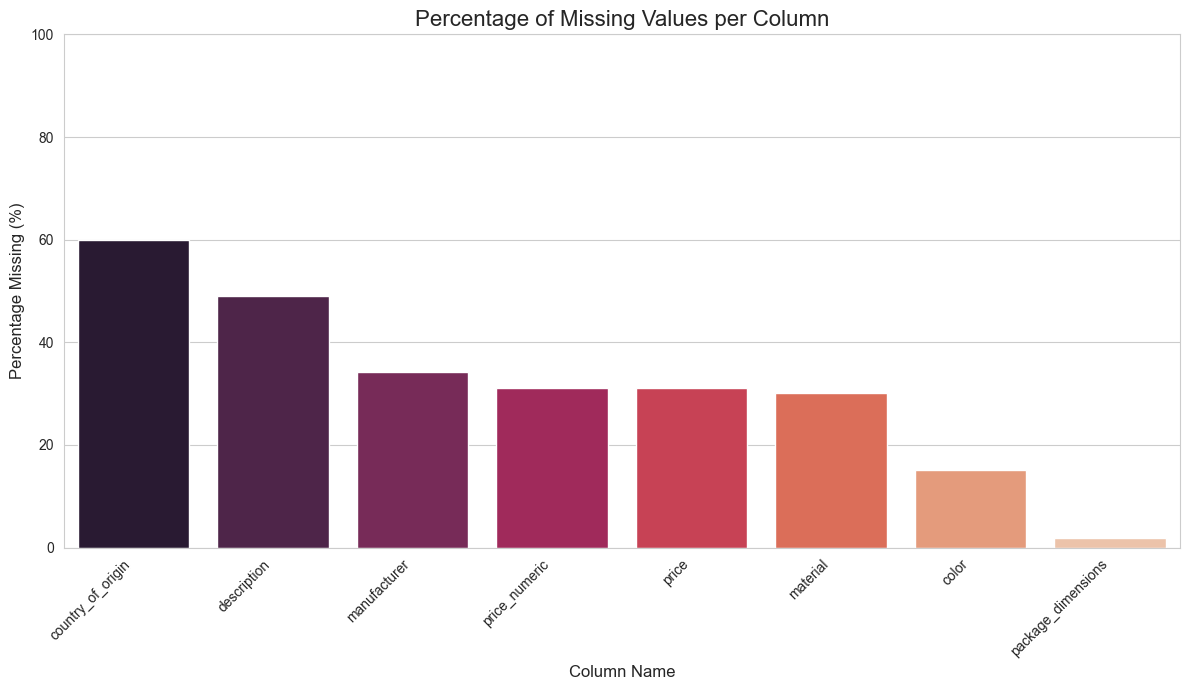

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0] # Only show columns with missing data

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="rocket")

plt.title('Percentage of Missing Values per Column', fontsize=16)
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Percentage Missing (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # Set y-axis to be from 0 to 100%
plt.tight_layout()
plt.show()